### Import Necessary Libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.metrics import classification_report

In [12]:
import nltk
from nltk.corpus import stopwords
from collections import Counter

### Load the dataset

In [15]:
df = pd.read_csv('mail_data.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Exploring The Dataset, Drop Duplicates and Gathering Useful Information About The Dataset 

In [19]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [20]:
df.shape

(5572, 2)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [22]:
df = df.drop_duplicates()

In [23]:
df['Category'].value_counts()

Category
ham     4516
spam     641
Name: count, dtype: int64

### Data Visualization Using Seaborn and Other Libraries

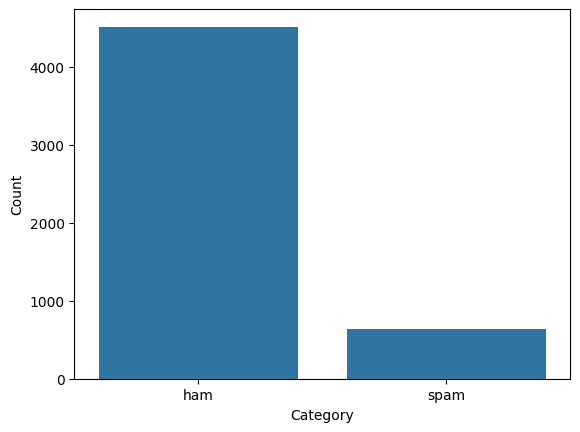

In [24]:
sns.countplot(data=df, x='Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

### The 4^th Step is Data Preprocessing

In [25]:
df.loc[df['Category']== 'spam','Category'] = 0
df.loc[df['Category']== 'ham','Category'] = 1

df.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
X = df['Message']
y = df['Category']

In [30]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5157, dtype: object

In [32]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5157, dtype: object

### Splitting Data to Train and Test Data

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

### Feature Extraction - TF-IDF
In this feature the row text converted into numerical data

In [34]:
# Create TF-IDF vectorizer to convert text message to numerical value
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english',lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

### ▶️ Model Training Using Algorithms

In [39]:
model = LogisticRegression()
model.fit(X_train_features,y_train)

LogisticRegression()

### After setting the model, The model is evaluated

In [46]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)

# Print accuracy
print('Accuracy on training data: {} %'.format(accuracy_on_training_data * 100))
print('Accuracy on test data: {} %'.format(accuracy_on_test_data * 100))

Accuracy on training data: 96.14545454545454 %
Accuracy on test data: 96.60852713178295 %


### Confusion Matrix Visualization If it needed

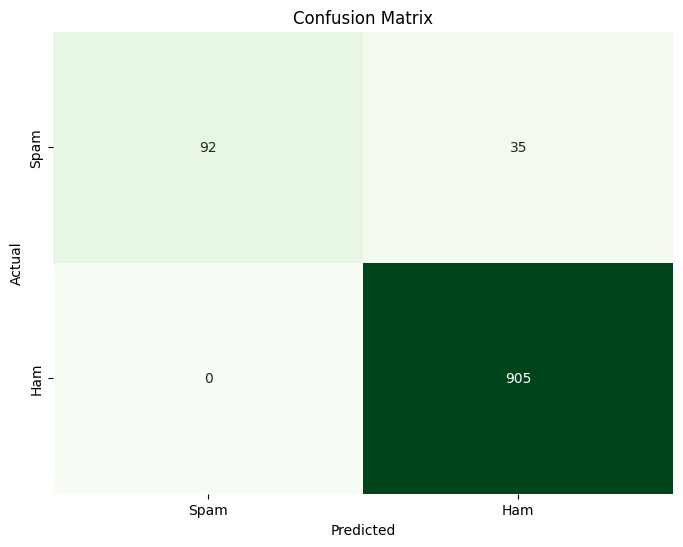

In [51]:
conf_matrix = confusion_matrix(y_test, prediction_on_test_data)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Calculating and Displaying Error Metrics

In [52]:
# Classification report
classification_rep = classification_report(y_test, prediction_on_test_data,target_names=['Spam', 'Ham'])
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

        Spam       1.00      0.72      0.84       127
         Ham       0.96      1.00      0.98       905

    accuracy                           0.97      1032
   macro avg       0.98      0.86      0.91      1032
weighted avg       0.97      0.97      0.96      1032



### Now we can make prediction using text message

In [ ]:
input_your_mail = "URGENT! We are trying to contact you. Last weekends draw shows that you have won a £900 prize GUARANTEED. Call 09061701939. Claim code S89. Valid 12hrs only"
input_data_feature = feature_extraction.transform([input_your_mail])
prediction = model.predict(input_data_feature)

if prediction[0] == 1:
    print('Ham mail')
else:
    print('Spam mail')

Spam mail
